In [1]:
# Versiones de librerias compatibles
!pip install numpy==1.24.3 pandas==1.5.3 matplotlib==3.7.2 seaborn==0.12.2 statsmodels==0.13.5 skimpy==0.0.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8

**CARGA DE DATASET ANUALES DESDE DRIVE Y GENERACION DEL ARCHIVO DATA.CSV**

In [2]:
from google.colab import drive
import pandas as pd
import os

drive.mount('/content/drive')
folder_path = '/content/drive/My Drive/Tesis/DATASET/'

dataframes = []

# Iterar sobre los archivos en la carpeta
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx') or filename.endswith('.xls'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_excel(file_path, header=0)  # Usar la primera fila como encabezado
        dataframes.append(df)

# Consolida los dataset, ignorando el índice original
combined_df = pd.concat(dataframes, ignore_index=True)

# Guardar el Dataset combinado como un archivo CSV
combined_df.to_csv('/content/drive/My Drive/Tesis/DATASET/DATA.csv', index=False)

# Carga Google Drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Tesis/DATASET/DATA.csv'

# Cargar el archivo CSV en un Dataset, sustitución nombre de variables
data = pd.read_csv(file_path, header=1)

print(data.head())
print(data.info())

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-2-9e4b56629624>:28: DtypeWarning: Columns (0,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, header=1)


   Anio  Mes     Empresa Grupo Consumo Provincia        Canton  \
0  2015  Ene  E.E. Norte     Comercial  IMBABURA        IBARRA   
1  2015  Ene  E.E. Norte     Comercial  IMBABURA  ANTONIO ANTE   
2  2015  Ene  E.E. Norte     Comercial  IMBABURA     COTACACHI   
3  2015  Ene  E.E. Norte     Comercial  IMBABURA     PIMAMPIRO   
4  2015  Ene  E.E. Norte     Comercial  IMBABURA     PIMAMPIRO   

                        Parroquia Numero Clientes Energia Facturada (kWh)  \
0                      ANGOCHAGUA              39                   21448   
1  IMBAYA (SAN LUIS DE COBUENDO)               19                    8706   
2      PLAZA GUTIERREZ (CALVARIO)               3                     827   
3    PIMAMPIRO, CABECERA CANTONAL             351                   64981   
4         SAN  FCO. DE SIGSIPAMBA               9                    2186   

  Facturacion Servicio Electrico (USD) Recaudacion (USD)  \
0                              2402.23           1839.28   
1                   

In [3]:
import numpy as np

# Eliminar las cabeceras que incluyen la palabra 'anio'
matches = data.applymap(lambda x: 'anio' in str(x).lower())
rows_with_anio = matches.any(axis=1)
result = np.where(matches)

for row, col in zip(result[0], result[1]):
    print(f'Palabra "anio" encontrada en fila {row}, columna {col}: {data.iloc[row, col]}')
# Eliminar las filas que contienen la palabra 'anio'
data_1 = data[~rows_with_anio]
print(data_1.head())
data_1.shape
data_1.info()


Palabra "anio" encontrada en fila 54505, columna 0: Anio
Palabra "anio" encontrada en fila 110054, columna 0: Anio
Palabra "anio" encontrada en fila 167600, columna 0: Anio
Palabra "anio" encontrada en fila 226223, columna 0: Anio
Palabra "anio" encontrada en fila 284962, columna 0: Anio
Palabra "anio" encontrada en fila 343924, columna 0: Anio
Palabra "anio" encontrada en fila 402902, columna 0: Anio
Palabra "anio" encontrada en fila 462597, columna 0: Anio
Palabra "anio" encontrada en fila 522951, columna 0: Anio
   Anio  Mes     Empresa Grupo Consumo Provincia        Canton  \
0  2015  Ene  E.E. Norte     Comercial  IMBABURA        IBARRA   
1  2015  Ene  E.E. Norte     Comercial  IMBABURA  ANTONIO ANTE   
2  2015  Ene  E.E. Norte     Comercial  IMBABURA     COTACACHI   
3  2015  Ene  E.E. Norte     Comercial  IMBABURA     PIMAMPIRO   
4  2015  Ene  E.E. Norte     Comercial  IMBABURA     PIMAMPIRO   

                        Parroquia Numero Clientes Energia Facturada (kWh)  \
0    

**CAMBIO DE TIPO DE DATO EN VARIABLES:**

In [4]:
cols_to_convert = ['Numero Clientes', 'Energia Facturada (kWh)', 'Facturacion Servicio Electrico (USD)',
                   'Recaudacion (USD)', 'Impuesto Bomberos (USD)', 'Basura (USD)',
                   'Tercera Edad (USD)', 'Tarifa Dignidad (USD)', 'Energia Subsidiada PEC (kWh)',
                   'Valor Subsidiado PEC USD']

for col in cols_to_convert:
      data_1 = data_1.assign(**{col: pd.to_numeric(data_1[col], errors='coerce') for col in cols_to_convert})

categorical_cols = ['Empresa', 'Grupo Consumo', 'Provincia', 'Canton', 'Parroquia']
for col in categorical_cols:
    data_1[col] = data_1[col].astype('category')
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577321 entries, 0 to 577329
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   Anio                                  577321 non-null  object  
 1   Mes                                   577321 non-null  object  
 2   Empresa                               577321 non-null  category
 3   Grupo Consumo                         577321 non-null  category
 4   Provincia                             577321 non-null  category
 5   Canton                                577321 non-null  category
 6   Parroquia                             577321 non-null  category
 7   Numero Clientes                       577321 non-null  int64   
 8   Energia Facturada (kWh)               577321 non-null  int64   
 9   Facturacion Servicio Electrico (USD)  577321 non-null  float64 
 10  Recaudacion (USD)                     577321 non-null  f

**CREACION VARIABLE FECHA A PARTIR DE ANIO Y MES**

In [5]:
import pandas as pd

# en base a anio y mes se crea una nueva columna en formato datatime
month_mapping = {
    'ene': '01', 'feb': '02', 'mar': '03', 'abr': '04', 'may': '05', 'jun': '06',
    'jul': '07', 'ago': '08', 'sep': '09', 'oct': '10', 'nov': '11', 'dic': '12'
}

def map_month(month):
    return month_mapping[month.lower()]
data_1['Mes_Num'] = data_1['Mes'].apply(map_month)
data_1['Anio'] = data_1['Anio'].astype(str)
data_1['Fecha'] = data_1['Anio'] + '-' + data_1['Mes_Num'] + '-01'
data_1['Fecha'] = pd.to_datetime(data_1['Fecha'])

print(data_1[['Anio', 'Mes', 'Fecha']].head())
data_1.info()

   Anio  Mes      Fecha
0  2015  Ene 2015-01-01
1  2015  Ene 2015-01-01
2  2015  Ene 2015-01-01
3  2015  Ene 2015-01-01
4  2015  Ene 2015-01-01
<class 'pandas.core.frame.DataFrame'>
Int64Index: 577321 entries, 0 to 577329
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Anio                                  577321 non-null  object        
 1   Mes                                   577321 non-null  object        
 2   Empresa                               577321 non-null  category      
 3   Grupo Consumo                         577321 non-null  category      
 4   Provincia                             577321 non-null  category      
 5   Canton                                577321 non-null  category      
 6   Parroquia                             577321 non-null  category      
 7   Numero Clientes                       577321 non-null  int64     

In [6]:
data_1.describe()

,Numero Clientes,Energia Facturada (kWh),Facturacion Servicio Electrico (USD),Recaudacion (USD),Impuesto Bomberos (USD),Basura (USD),Tercera Edad (USD),Tarifa Dignidad (USD),Energia Subsidiada PEC (kWh),Valor Subsidiado PEC USD
count,577321.000000,5.773210e+05,5.773210e+05,5.773210e+05,5.773210e+05,5.773210e+05,577321.000000,577321.000000,5.773210e+05,577321.000000
mean,1068.204417,3.512955e+05,3.288144e+04,3.058515e+04,2.545772e+03,2.709775e+03,273.510754,784.425826,3.515759e+03,278.521188
std,7344.278922,2.479769e+06,2.180570e+05,2.083529e+05,1.523365e+04,1.861878e+04,2316.236264,4292.389899,3.133776e+04,2648.202911
min,0.000000,-9.666283e+07,-6.894811e+06,-3.223322e+06,-2.561855e+06,-9.000916e+05,-4290.130000,-56287.690000,-8.000000e+01,-99.720000
25%,12.000000,3.578000e+03,3.208300e+02,2.679600e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
50%,50.000000,2.503100e+04,2.513950e+03,2.113830e+03,1.428000e+02,1.146000e+01,0.000000,0.000000,0.000000e+00,0.000000
75%,415.000000,1.420460e+05,1.385322e+04,1.203919e+04,1.326000e+03,6.894800e+02,5.540000,59.900000,0.000000e+00,0.000000
max,708455.000000,1.401134e+08,1.045552e+07,1.187797e+07,1.295712e+06,1.890366e+06,159319.740000,447230.430000,2.591696e+06,233252.640000


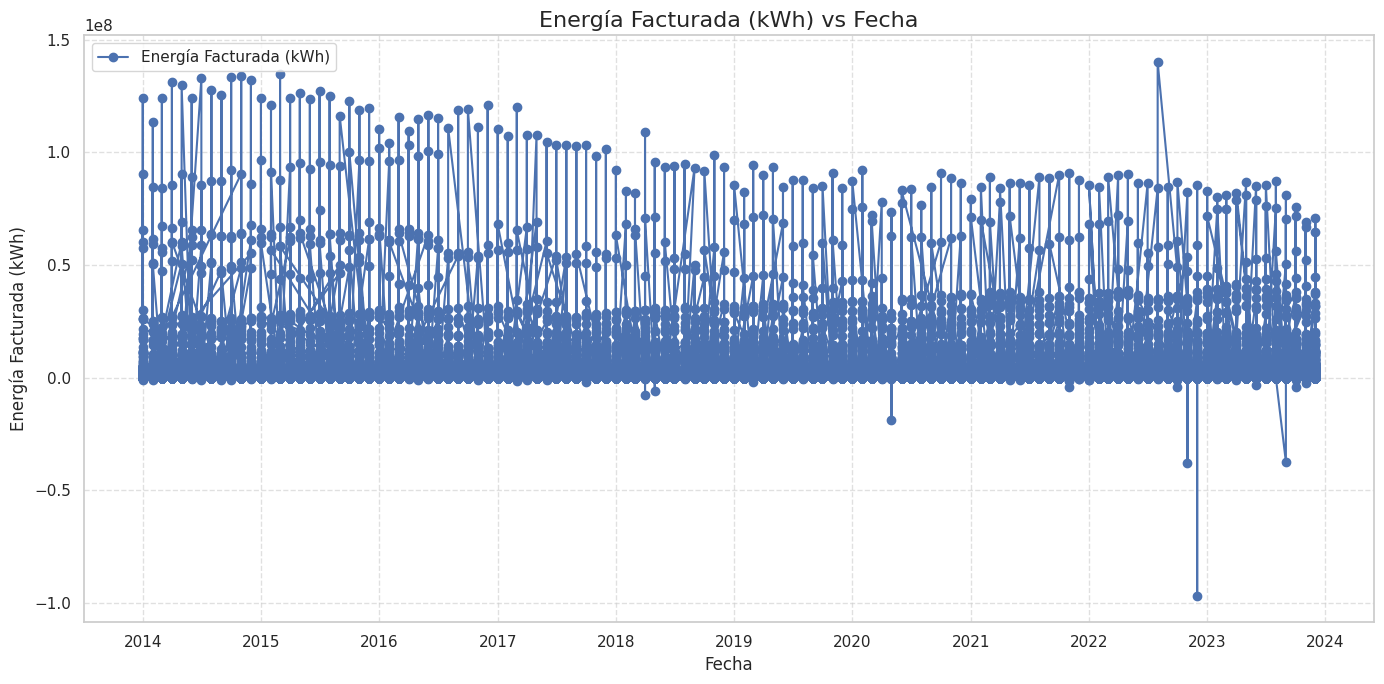

In [7]:
import seaborn as sns
sns.set_theme(style='whitegrid')
import matplotlib.pyplot as plt

# Configuración del tamaño de la figura
plt.figure(figsize=(14, 7))

# Gráfico de línea
plt.plot(data_1['Fecha'], data_1['Energia Facturada (kWh)'], marker='o', linestyle='-', color='b', label='Energía Facturada (kWh)')

# Configuración de títulos y etiquetas
plt.title('Energía Facturada (kWh) vs Fecha', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Energía Facturada (kWh)', fontsize=12)

# Personalización del diseño
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Mostrar la gráfica
plt.show()


**VALOR ABSOLUTO VARIABLE ENERGIA FACTURADA (KHW)**

In [8]:
# Filas con valores negativos en 'Energia Facturada (kWh)'
valores_negativos = data_1[data_1['Energia Facturada (kWh)'] < 0]
print("Filas con valores negativos en 'Energia Facturada (kWh)':")
print(valores_negativos)

data_1['Energia Facturada (kWh)'] = data_1['Energia Facturada (kWh)'].abs()
print("Transformación completada. Todos los valores son positivos.")


Filas con valores negativos en 'Energia Facturada (kWh)':
        Anio  Mes               Empresa Grupo Consumo        Provincia  \
1294    2015  Mar       E.E. Centro Sur         Otros  MORONA SANTIAGO   
1427    2015  Ene       E.E. Centro Sur     Comercial            AZUAY   
1535    2015  Ene       CNEL-Esmeraldas     Comercial       ESMERALDAS   
1547    2015  Ene       CNEL-Esmeraldas         Otros       ESMERALDAS   
1565    2015  Ene       CNEL-Esmeraldas   Residencial       ESMERALDAS   
...      ...  ...                   ...           ...              ...   
576080  2014  Sep       CNEL-Esmeraldas     Comercial       ESMERALDAS   
576273  2014  Sep       E.E. Centro Sur         Otros  MORONA SANTIAGO   
576535  2014  Ene  CNEL-Guayas Los Ríos         Otros           GUAYAS   
576653  2014  Sep       CNEL-Esmeraldas         Otros       ESMERALDAS   
576784  2014  Ene            E.E. Norte    Industrial         IMBABURA   

                Canton                         Parroq

In [9]:
data_1.describe()

,Numero Clientes,Energia Facturada (kWh),Facturacion Servicio Electrico (USD),Recaudacion (USD),Impuesto Bomberos (USD),Basura (USD),Tercera Edad (USD),Tarifa Dignidad (USD),Energia Subsidiada PEC (kWh),Valor Subsidiado PEC USD
count,577321.000000,5.773210e+05,5.773210e+05,5.773210e+05,5.773210e+05,5.773210e+05,577321.000000,577321.000000,5.773210e+05,577321.000000
mean,1068.204417,3.522701e+05,3.288144e+04,3.058515e+04,2.545772e+03,2.709775e+03,273.510754,784.425826,3.515759e+03,278.521188
std,7344.278922,2.479631e+06,2.180570e+05,2.083529e+05,1.523365e+04,1.861878e+04,2316.236264,4292.389899,3.133776e+04,2648.202911
min,0.000000,0.000000e+00,-6.894811e+06,-3.223322e+06,-2.561855e+06,-9.000916e+05,-4290.130000,-56287.690000,-8.000000e+01,-99.720000
25%,12.000000,3.614000e+03,3.208300e+02,2.679600e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
50%,50.000000,2.510300e+04,2.513950e+03,2.113830e+03,1.428000e+02,1.146000e+01,0.000000,0.000000,0.000000e+00,0.000000
75%,415.000000,1.422410e+05,1.385322e+04,1.203919e+04,1.326000e+03,6.894800e+02,5.540000,59.900000,0.000000e+00,0.000000
max,708455.000000,1.401134e+08,1.045552e+07,1.187797e+07,1.295712e+06,1.890366e+06,159319.740000,447230.430000,2.591696e+06,233252.640000


# ***EDA***

**Medidas de tendencia central**

In [10]:
import pandas as pd
# Lista de columnas para el análisis
columnas = [
    'Numero Clientes',
    'Energia Facturada (kWh)',
    'Facturacion Servicio Electrico (USD)',
    'Recaudacion (USD)',
    'Impuesto Bomberos (USD)',
    'Basura (USD)',
    'Tercera Edad (USD)',
    'Tarifa Dignidad (USD)',
    'Energia Subsidiada PEC (kWh)',
    'Valor Subsidiado PEC USD'
]

# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {
    'Columna': [],
    'Media': [],
    'Mediana': [],
    'Modas': [],
    'Varianza': [],
    'Desviación Estándar': [],
    'Rango': []
}

# Calcular estadísticas y almacenar en el diccionario
for columna in columnas:
    if pd.api.types.is_numeric_dtype(data_1[columna]):
        media = data_1[columna].mean()
        mediana = data_1[columna].median()
        modas = data_1[columna].mode().head(10).tolist()
        varianza = data_1[columna].var()
        desviacion_estandar = data_1[columna].std()
        rango_valores = data_1[columna].max() - data_1[columna].min()

        modas_str = ', '.join(map(str, modas)) if modas else "No hay modas"

        estadisticas_dict['Columna'].append(columna)
        estadisticas_dict['Media'].append(media)
        estadisticas_dict['Mediana'].append(mediana)
        estadisticas_dict['Modas'].append(modas_str)
        estadisticas_dict['Varianza'].append(varianza)
        estadisticas_dict['Desviación Estándar'].append(desviacion_estandar)
        estadisticas_dict['Rango'].append(rango_valores)
    else:
        print(f"La columna '{columna}' no es numérica y ha sido omitida.")

# Crear un DataFrame con las estadísticas
estadisticas_df = pd.DataFrame(estadisticas_dict)

# Mostrar el DataFrame
print(estadisticas_df)


                                Columna          Media   Mediana Modas  \
0                       Numero Clientes    1068.204417     50.00     1   
1               Energia Facturada (kWh)  352270.058934  25103.00     0   
2  Facturacion Servicio Electrico (USD)   32881.439210   2513.95   0.0   
3                     Recaudacion (USD)   30585.146852   2113.83   0.0   
4               Impuesto Bomberos (USD)    2545.771912    142.80   0.0   
5                          Basura (USD)    2709.775431     11.46   0.0   
6                    Tercera Edad (USD)     273.510754      0.00   0.0   
7                 Tarifa Dignidad (USD)     784.425826      0.00   0.0   
8          Energia Subsidiada PEC (kWh)    3515.759348      0.00   0.0   
9              Valor Subsidiado PEC USD     278.521188      0.00   0.0   

       Varianza  Desviación Estándar         Rango  
0  5.393843e+07         7.344279e+03  7.084550e+05  
1  6.148571e+12         2.479631e+06  1.401134e+08  
2  4.754884e+10         2.

**VISUALIZACION DATOS**


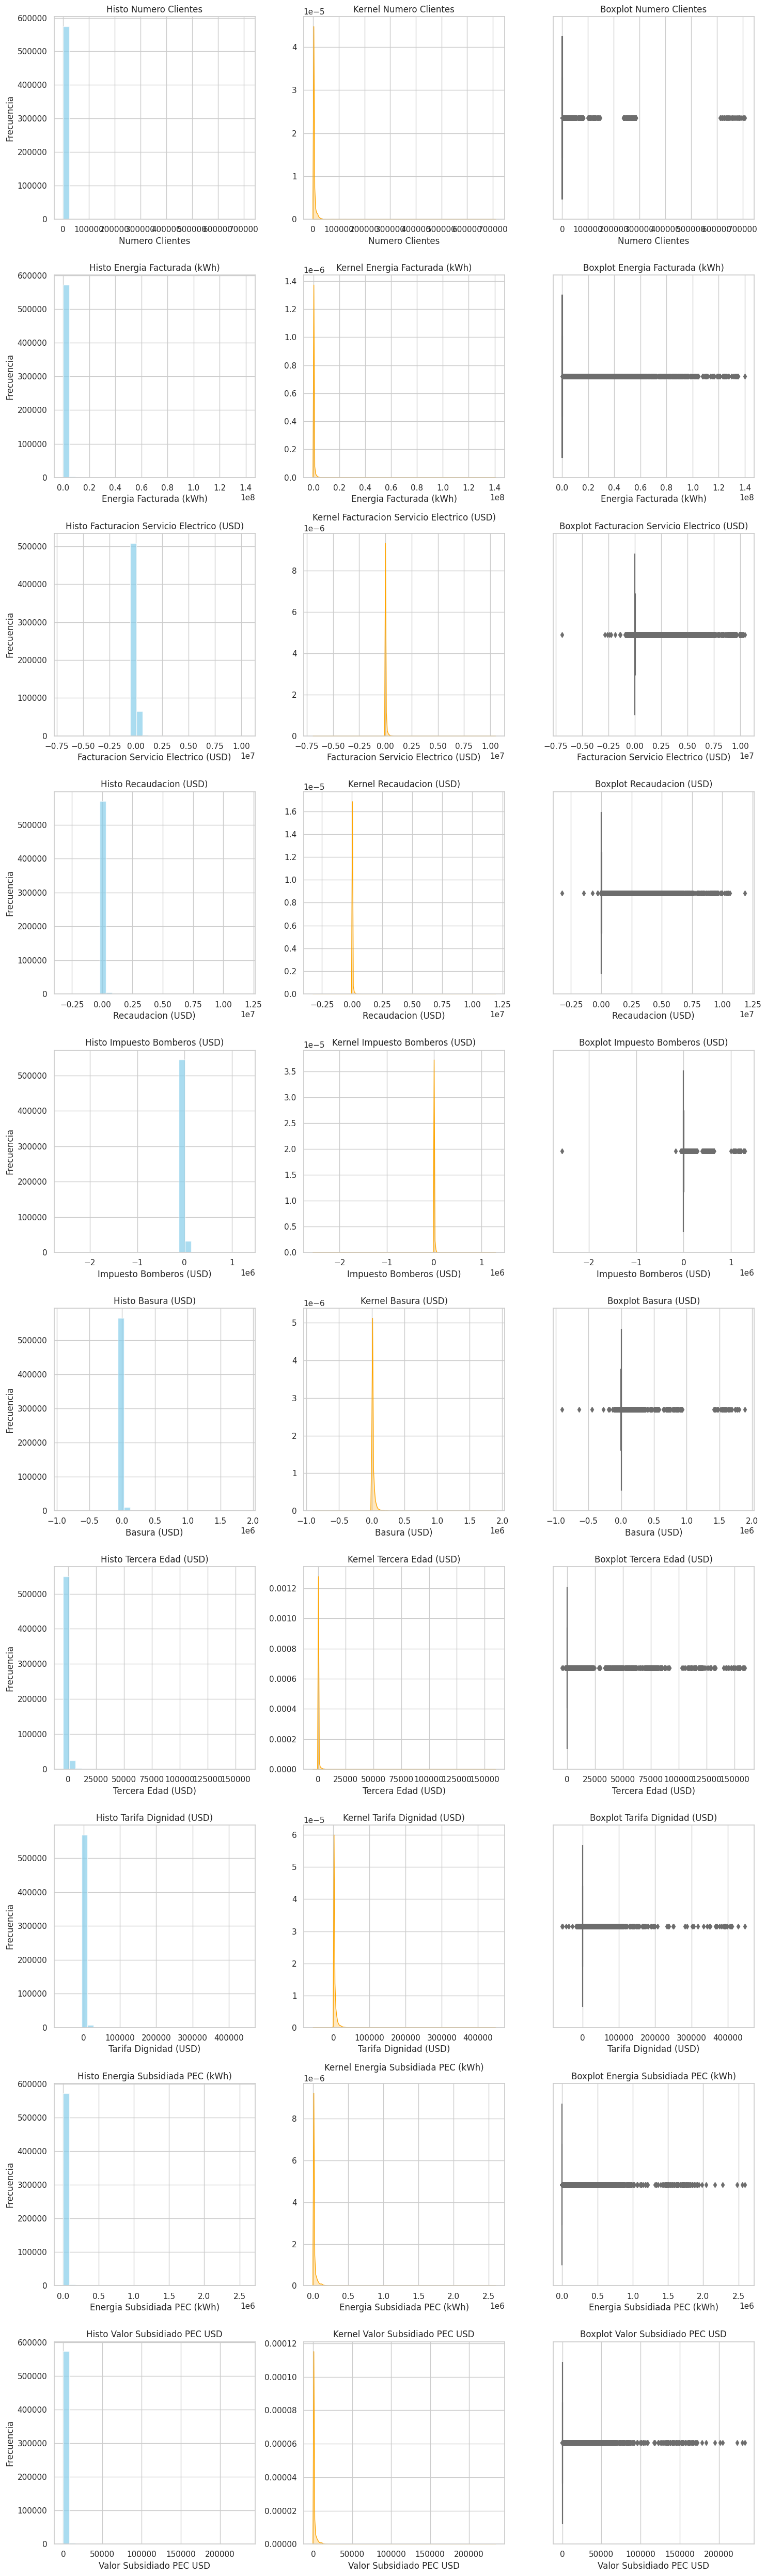

In [11]:
import seaborn as sns
sns.set_theme(style='whitegrid')
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas numéricas para el análisis
var_num = ['Numero Clientes', 'Energia Facturada (kWh)', 'Facturacion Servicio Electrico (USD)',
           'Recaudacion (USD)', 'Impuesto Bomberos (USD)', 'Basura (USD)', 'Tercera Edad (USD)',
           'Tarifa Dignidad (USD)', 'Energia Subsidiada PEC (kWh)', 'Valor Subsidiado PEC USD']

# Definición de la función para generar histograma, KDE y boxplot
def plot_histogram_kde_boxplot(data, var_num):
    num_vars = len(var_num)
    fig, axs = plt.subplots(num_vars, 3, figsize=(15, 5*num_vars))

    for i, variable in enumerate(var_num):
        # Histograma
        axs[i, 0].hist(data[variable], bins=30, color='skyblue', alpha=0.7)
        axs[i, 0].set_title(f'Histo {variable}')
        axs[i, 0].set_xlabel(variable)
        axs[i, 0].set_ylabel('Frecuencia')

        # Densidad de Kernel
        sns.kdeplot(data=data[variable], fill=True, ax=axs[i, 1], color='orange')
        axs[i, 1].set_title(f'Kernel {variable}')
        axs[i, 1].set_xlabel(variable)
        axs[i, 1].set_ylabel('')

        # Boxplot
        sns.boxplot(x=data[variable], ax=axs[i, 2], orient='h', color='salmon')
        axs[i, 2].set_title(f'Boxplot {variable}')
        axs[i, 2].set_xlabel(variable)
        axs[i, 2].set_ylabel('')

    plt.tight_layout()
    plt.show()

# Llamar a la función con el dataset y las variables numéricas
plot_histogram_kde_boxplot(data_1, var_num)


In [12]:
!pip install skimpy
import skimpy

In [13]:
skimpy.skim(data_1)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 577321 │ │ float64     │ 8     │ │ Empresa               │                                │
│ │ Number of columns │ 19     │ │ category    │ 5     │ │ Grupo Consumo         │                                │
│ └───────────────────┴────────┘ │ string      │ 3     │ │ Provincia             │                                │
│                                │ int64       │ 2     │ │ Canton                │                                │
│                                │ datetime64  │ 1     │ │ Parroquia             │                                │
│                                └─────────────┴───────┘ └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd       ┃ p0        ┃ p25  ┃ p75    ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Numero Clientes        │   0 │     0 │    1100 │     7300 │         0 │   12 │    420 │    710000 │   █    │  │
│ │ Energia Facturada (k   │   0 │     0 │  350000 │  2500000 │         0 │ 3600 │ 140000 │ 140000000 │   █    │  │
│ │ Facturacion Servicio   │   0 │     0 │   33000 │   220000 │  -6900000 │  320 │  14000 │  10000000 │    █   │  │
│ │ Recaudacion (USD)      │   0 │     0 │   31000 │   210000 │  -3200000 │  270 │  12000 │  12000000 │    █   │  │
│ │ Impuesto Bomberos (U   │   0 │     0 │    2500 │    15000 │  -2600000 │    0 │   1300 │   1300000 │     █  │  │
│ │ Basura (USD)           │   0 │     0 │    2700 │    19000 │   -900000 │    0 │    690 │   1900000 │    █   │  │
│ │ Tercera Edad (USD)     │   0 │     0 │     270 │     2300 │     -4300 │    0 │    5.5 │    160000 │   █    │  │
│ │ Tarifa Dignidad (USD   │   0 │     0 │     780 │     4300 │    -56000 │    0 │     60 │    450000 │   █    │  │
│ │ Energia Subsidiada P   │   0 │     0 │    3500 │    31000 │       -80 │    0 │      0 │   2600000 │   █    │  │
│ │ Valor Subsidiado PEC   │   0 │     0 │     280 │     2600 │      -100 │    0 │      0 │    230000 │   █    │  │
│ └────────────────────────┴─────┴───────┴─────────┴──────────┴───────────┴──────┴────────┴───────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA       ┃ NA %          ┃ ordered              ┃ unique            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ Empresa                              │        0 │             0 │ False                │                20 │  │
│ │ Grupo Consumo                        │        0 │             0 │ False                │                 5 │  │
│ │ Provincia                            │        0 │             0 │ False                │                26 │  │
│ │ Canton                               │        0 │             0 │ False                │               290 │  │
│ │ Parroquia                            │        0 │   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577321 entries, 0 to 577329
Data columns (total 19 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Anio                                  577321 non-null  string        
 1   Mes                                   577321 non-null  string        
 2   Empresa                               577321 non-null  category      
 3   Grupo Consumo                         577321 non-null  category      
 4   Provincia                             577321 non-null  category      
 5   Canton                                577321 non-null  category      
 6   Parroquia                             577321 non-null  category      
 7   Numero Clientes                       577321 non-null  int64         
 8   Energia Facturada (kWh)               577321 non-null  int64         
 9   Facturacion Servicio Electrico (USD)  577321 non-null  floa

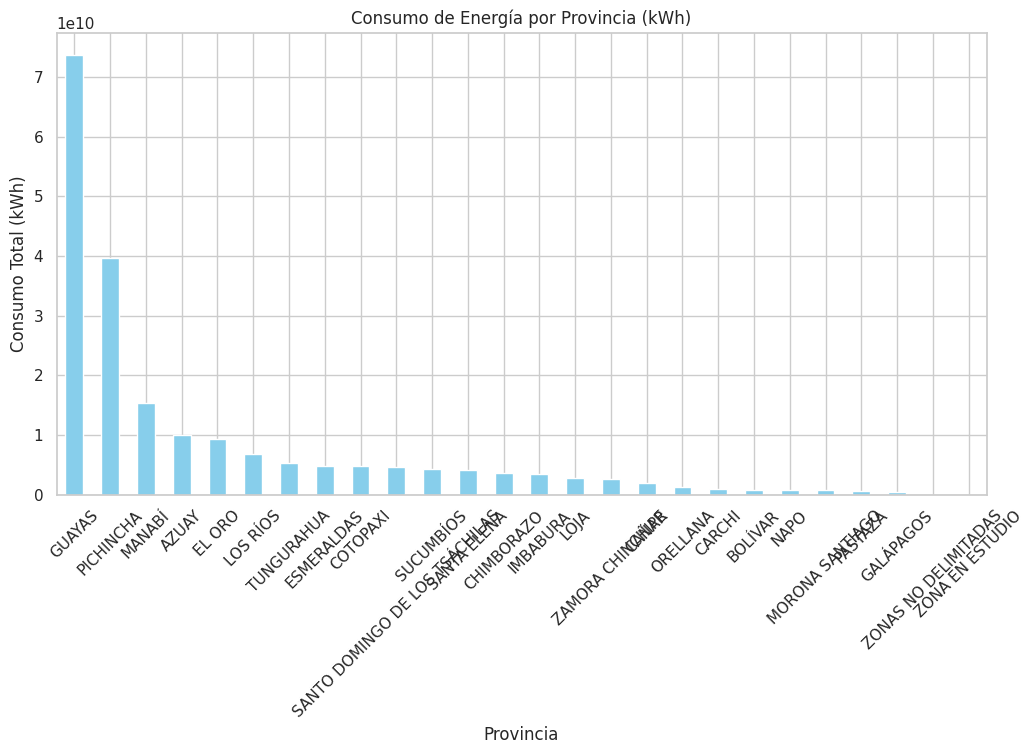

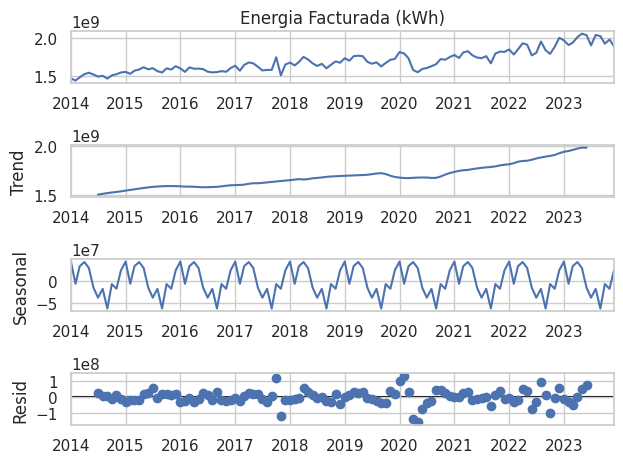

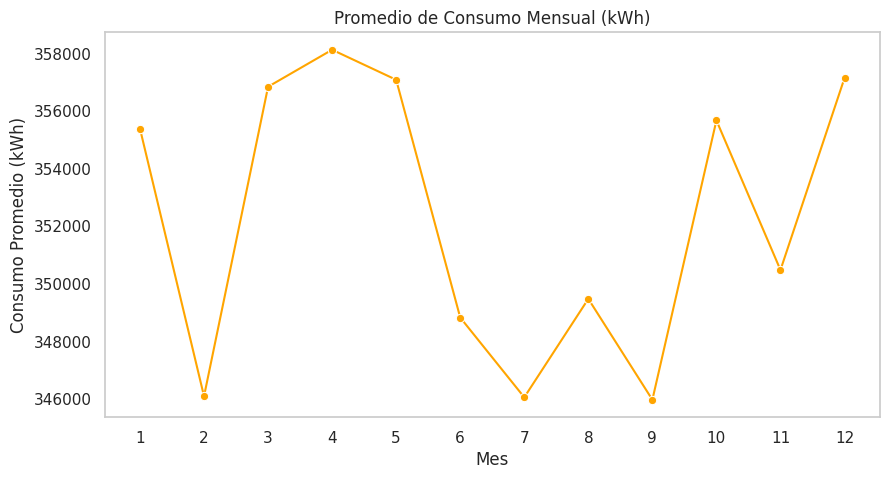

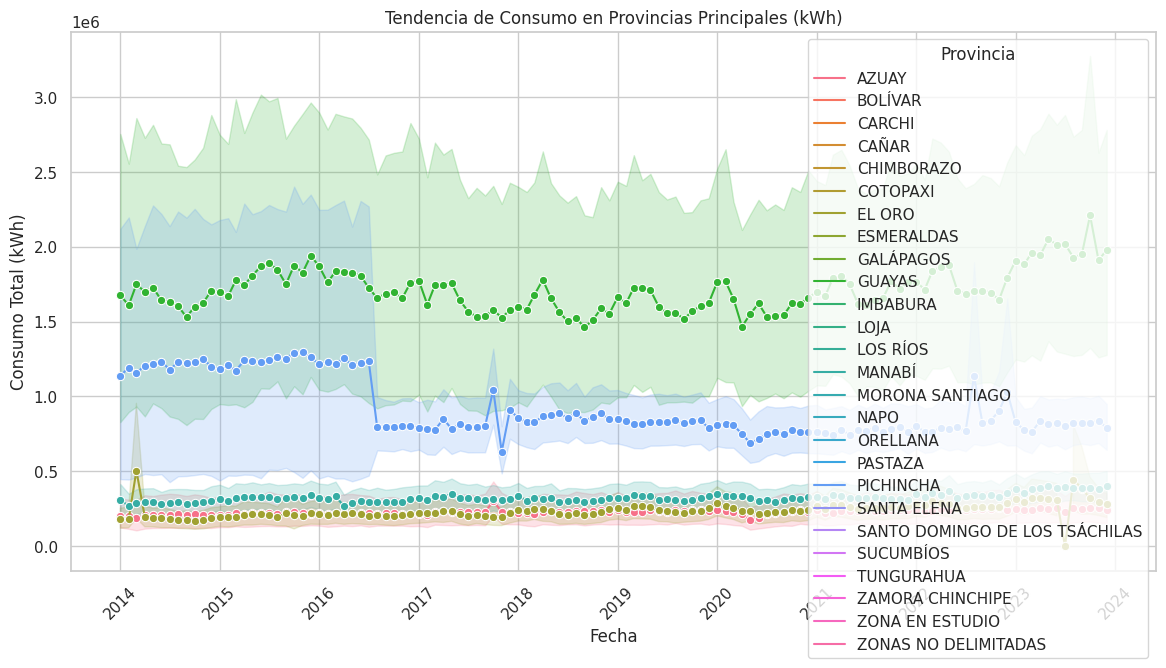

In [14]:
import seaborn as sns
sns.set_theme(style='whitegrid')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Verifica el formato del Dataset
print(data_1.info())
print(data_1[['Provincia', 'Canton', 'Energia Facturada (kWh)', 'Fecha']].head())

# Asegurar que la variable temporal esté en formato datetime
data_1['Fecha'] = pd.to_datetime(data_1['Fecha'])

# Agregar columnas de año y mes si no existen
data_1['Año'] = data_1['Fecha'].dt.year
data_1['Mes'] = data_1['Fecha'].dt.month

# Análisis de patrones por provincia
provincia_consumo = data_1.groupby('Provincia')['Energia Facturada (kWh)'].sum().sort_values(ascending=False)

# Gráfico de barras: Consumo por provincia
plt.figure(figsize=(12, 6))
provincia_consumo.plot(kind='bar', color='skyblue')
plt.title('Consumo de Energía por Provincia (kWh)')
plt.ylabel('Consumo Total (kWh)')
plt.xlabel('Provincia')
plt.xticks(rotation=45)
plt.show()

# Tendencias estacionales: Agregar consumo mensual total
data_mensual = data_1.groupby('Fecha')['Energia Facturada (kWh)'].sum().reset_index()

#
decompose_result = seasonal_decompose(data_mensual.set_index('Fecha')['Energia Facturada (kWh)'], model='additive', period=12)


decompose_result.plot()
plt.show()

# Análisis estacional: Tendencias por mes
data_1['Mes_Num'] = data_1['Mes']
consumo_por_mes = data_1.groupby('Mes_Num')['Energia Facturada (kWh)'].mean()

# Gráfico de líneas: Consumo promedio por mes (estacionalidad)
plt.figure(figsize=(10, 5))
sns.lineplot(x=consumo_por_mes.index, y=consumo_por_mes.values, marker='o', color='orange')
plt.title('Promedio de Consumo Mensual (kWh)')
plt.xlabel('Mes')
plt.ylabel('Consumo Promedio (kWh)')
plt.xticks(range(1, 13))
plt.grid()
plt.show()

# Análisis regional-temporal: Comparar provincias en el tiempo
provincias_top = provincia_consumo.head(5).index
data_top_provincias = data_1[data_1['Provincia'].isin(provincias_top)]

# Gráfico de líneas: Tendencia de consumo en las provincias principales
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_top_provincias, x='Fecha', y='Energia Facturada (kWh)', hue='Provincia', marker='o')
plt.title('Tendencia de Consumo en Provincias Principales (kWh)')
plt.ylabel('Consumo Total (kWh)')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.legend(title='Provincia')
plt.show()


In [15]:
# Mostrar los valores únicos de la variable 'Provincia'
valores_unicos_provincia = data_1['Provincia'].unique()

# Imprimir los valores únicos
print(valores_unicos_provincia)



['IMBABURA', 'CAÑAR', 'LOS RÍOS', 'MORONA SANTIAGO', 'SANTA ELENA', ..., 'SANTO DOMINGO DE LOS TSÁCHILAS', 'BOLÍVAR', 'MANABÍ', 'ZONAS NO DELIMITADAS', 'ZONA EN ESTUDIO']
Length: 26
Categories (26, object): ['AZUAY', 'BOLÍVAR', 'CARCHI', 'CAÑAR', ..., 'TUNGURAHUA',
                          'ZAMORA CHINCHIPE', 'ZONA EN ESTUDIO', 'ZONAS NO DELIMITADAS']


In [16]:
# Mostrar las frecuencias de las variables categóricas
columnas_categoricas = data_1.select_dtypes(include='category').columns

# Iterar sobre las columnas categóricas y mostrar sus frecuencias
for columna in columnas_categoricas:
    print(f"Frecuencias para '{columna}':")
    print(data_1[columna].value_counts())
    print("-" * 30)


Frecuencias para 'Empresa':
E.E. Centro Sur         75432
E.E. Sur                61503
E.E. Norte              46015
E.E. Quito              45949
CNEL-El Oro             42845
E.E. Ambato             39112
CNEL-Manabí             38754
CNEL-Guayas Los Ríos    31614
CNEL-Esmeraldas         28481
CNEL-Sucumbíos          27503
E.E. Riobamba           25145
CNEL-Sto. Domingo       21853
E.E. Cotopaxi           20659
CNEL-Los Ríos           13826
CNEL-Bolívar            13724
CNEL-Milagro            12934
CNEL-Sta. Elena         11992
E.E. Azogues             7986
CNEL-Guayaquil           7898
E.E. Galápagos           4096
Name: Empresa, dtype: int64
------------------------------
Frecuencias para 'Grupo Consumo':
Residencial          155855
Otros                150028
Comercial            146107
Industrial           113245
Alumbrado Público     12086
Name: Grupo Consumo, dtype: int64
------------------------------
Frecuencias para 'Provincia':
MANABÍ                            47343
LOJA

In [17]:
import seaborn as sns
sns.set_theme(style='whitegrid')
import matplotlib.pyplot as plt

# Seleccionar las columnas categóricas
columnas_categoricas = data_1.select_dtypes(include='category').columns

# Crear un gráfico pastel para cada variable categórica
for columna in columnas_categoricas:
    # Obtener las frecuencias de cada categoría
    frecuencias = data_1[columna].value_counts()

    # Crear el gráfico pastel
    plt.figure(figsize=(8, 8))
    plt.pie(frecuencias, labels=frecuencias.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    plt.title(f'Distribución de {columna}')
    plt.axis('equal')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

**LIMPIEZA Y TRANSFORMACION DE DATOS**

In [18]:
#ELIMINACION DE COLUMNAS, QUE NO INFLUYEN EN EL CALCULO
data_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 577321 entries, 0 to 577329
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Anio                                  577321 non-null  string        
 1   Mes                                   577321 non-null  int64         
 2   Empresa                               577321 non-null  category      
 3   Grupo Consumo                         577321 non-null  category      
 4   Provincia                             577321 non-null  category      
 5   Canton                                577321 non-null  category      
 6   Parroquia                             577321 non-null  category      
 7   Numero Clientes                       577321 non-null  int64         
 8   Energia Facturada (kWh)               577321 non-null  int64         
 9   Facturacion Servicio Electrico (USD)  577321 non-null  floa

In [19]:
columnas_a_eliminar = list(data_1.columns[0:2]) + list(data_1.columns[10:17])
data_2 = data_1.drop(columns=columnas_a_eliminar)
print(data_2.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 577321 entries, 0 to 577329
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Empresa                               577321 non-null  category      
 1   Grupo Consumo                         577321 non-null  category      
 2   Provincia                             577321 non-null  category      
 3   Canton                                577321 non-null  category      
 4   Parroquia                             577321 non-null  category      
 5   Numero Clientes                       577321 non-null  int64         
 6   Energia Facturada (kWh)               577321 non-null  int64         
 7   Facturacion Servicio Electrico (USD)  577321 non-null  float64       
 8   Mes_Num                               577321 non-null  int64         
 9   Fecha                                 577321 non-null  date

**Limpieza de datos - variables categóricas**

In [20]:
import pandas as pd
import unicodedata

# Función para normalizar texto
def normalizar_texto(texto):
    if isinstance(texto, str):
        texto = unicodedata.normalize('NFKD', texto)
        texto = ''.join(c for c in texto if not unicodedata.combining(c))
        texto = texto.lower().strip()
        return texto
    return texto

# Aplicar la normalización a las columnas categóricas
categorical_columns = data_2.select_dtypes(include='category').columns

for column in categorical_columns:
    # Convertir a strings, normalizar y luego volver a categoría
    data_2[column] = data_2[column].astype(str).apply(normalizar_texto).astype('category')

print(data_2[categorical_columns].head())


      Empresa Grupo Consumo Provincia        Canton  \
0  e.e. norte     comercial  imbabura        ibarra   
1  e.e. norte     comercial  imbabura  antonio ante   
2  e.e. norte     comercial  imbabura     cotacachi   
3  e.e. norte     comercial  imbabura     pimampiro   
4  e.e. norte     comercial  imbabura     pimampiro   

                       Parroquia  
0                     angochagua  
1  imbaya (san luis de cobuendo)  
2     plaza gutierrez (calvario)  
3   pimampiro, cabecera cantonal  
4        san  fco. de sigsipamba  


In [21]:

categorical_columns = data_2.select_dtypes(include='category').columns
unique_values_dict = {}
# Iterar sobre las columnas categóricas y contar valores únicos
for column in categorical_columns:
    unique_values = data_2[column].unique()  # Obtener valores únicos
    unique_count = len(unique_values)       # Contar valores únicos
    unique_values_dict[column] = {
        'count': unique_count,
        'values': unique_values
    }
for column, info in unique_values_dict.items():
    print(f"Columna: {column}")
    print(f" - Cantidad de valores únicos: {info['count']}")
    print(f" - Valores únicos: {info['values'][:10]}")  # Muestra los primeros 10 valores
    print()


Columna: Empresa
 - Cantidad de valores únicos: 20
 - Valores únicos: ['e.e. norte', 'e.e. centro sur', 'cnel-los rios', 'cnel-sta. elena', 'cnel-esmeraldas', 'cnel-milagro', 'cnel-el oro', 'e.e. quito', 'cnel-sucumbios', 'e.e. sur']
Categories (20, object): ['cnel-bolivar', 'cnel-el oro', 'cnel-esmeraldas', 'cnel-guayaquil', ...,
                          'e.e. norte', 'e.e. quito', 'e.e. riobamba', 'e.e. sur']

Columna: Grupo Consumo
 - Cantidad de valores únicos: 5
 - Valores únicos: ['comercial', 'industrial', 'otros', 'residencial', 'alumbrado publico']
Categories (5, object): ['alumbrado publico', 'comercial', 'industrial', 'otros', 'residencial']

Columna: Provincia
 - Cantidad de valores únicos: 26
 - Valores únicos: ['imbabura', 'canar', 'los rios', 'morona santiago', 'santa elena', 'guayas', 'esmeraldas', 'sucumbios', 'orellana', 'carchi']
Categories (26, object): ['azuay', 'bolivar', 'canar', 'carchi', ..., 'tungurahua',
                          'zamora chinchipe', 'zona en

In [22]:
# Verificar filas duplicadas
filas_duplicadas = data_2.duplicated().sum()
print(f"Filas duplicadas: {filas_duplicadas}")

# Verificar filas con datos faltantes
filas_sin_datos = data_2.isnull().sum()
print("Filas con datos faltantes por columna:")
print(filas_sin_datos)

# Verificar si el DataFrame contiene filas completamente vacías
filas_completamente_vacias = data_2.isnull().all(axis=1).sum()
print(f"Filas completamente vacías: {filas_completamente_vacias}")



Filas duplicadas: 5
Filas con datos faltantes por columna:
Empresa                                 0
Grupo Consumo                           0
Provincia                               0
Canton                                  0
Parroquia                               0
Numero Clientes                         0
Energia Facturada (kWh)                 0
Facturacion Servicio Electrico (USD)    0
Mes_Num                                 0
Fecha                                   0
Año                                     0
dtype: int64
Filas completamente vacías: 0


In [23]:
# Data_4.csv  dataset procesado guardado en drive
ruta_archivo = '/content/drive/My Drive/Tesis/DATASET/data_4.csv'
data_2.to_csv(ruta_archivo, index=False)
print(f"Archivo guardado exitosamente en: {ruta_archivo}")
data_4 = pd.read_csv(ruta_archivo)
data_4.info()
data_4.head()


Archivo guardado exitosamente en: /content/drive/My Drive/Tesis/DATASET/data_4.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577321 entries, 0 to 577320
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Empresa                               577321 non-null  object 
 1   Grupo Consumo                         577321 non-null  object 
 2   Provincia                             577321 non-null  object 
 3   Canton                                577321 non-null  object 
 4   Parroquia                             577321 non-null  object 
 5   Numero Clientes                       577321 non-null  int64  
 6   Energia Facturada (kWh)               577321 non-null  int64  
 7   Facturacion Servicio Electrico (USD)  577321 non-null  float64
 8   Mes_Num                               577321 non-null  int64  
 9   Fecha                                 577321 non-null

,Empresa,Grupo Consumo,Provincia,Canton,Parroquia,Numero Clientes,Energia Facturada (kWh),Facturacion Servicio Electrico (USD),Mes_Num,Fecha,Año
0,e.e. norte,comercial,imbabura,ibarra,angochagua,39,21448,2402.23,1,2015-01-01,2015
1,e.e. norte,comercial,imbabura,antonio ante,imbaya (san luis de cobuendo),19,8706,877.93,1,2015-01-01,2015
2,e.e. norte,comercial,imbabura,cotacachi,plaza gutierrez (calvario),3,827,85.77,1,2015-01-01,2015
3,e.e. norte,comercial,imbabura,pimampiro,"pimampiro, cabecera cantonal",351,64981,6846.56,1,2015-01-01,2015
4,e.e. norte,comercial,imbabura,pimampiro,san fco. de sigsipamba,9,2186,225.97,1,2015-01-01,2015


ORDEN CRONOLOGICO

In [24]:
import pandas as pd

# Convertir la columna 'Fecha' al tipo datetime y ordenar el DataFrame por fecha
data_4['Fecha'] = pd.to_datetime(data_4['Fecha'], format='%Y-%m-%d')
data_4 = data_4.sort_values(by='Fecha').reset_index(drop=True)

# Generar un rango de fechas mensuales
start_date = data_4['Fecha'].min()
end_date = data_4['Fecha'].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Crear un DataFrame con el rango de fechas como base
base_df = pd.DataFrame({'Fecha': date_range})

# Unir el rango de fechas con los datos originales para asegurar marcas de tiempo equidistantes
data_5 = pd.merge(base_df, data_4, on='Fecha', how='left')

# Verificar las primeras y últimas filas del nuevo DataFrame
data_5.head(), data_5.tail()


(       Fecha          Empresa Grupo Consumo   Provincia     Canton  \
 0 2014-01-01      cnel-el oro   residencial      el oro  las lajas   
 1 2014-01-01  cnel-esmeraldas   residencial  esmeraldas   quininde   
 2 2014-01-01  cnel-esmeraldas     comercial  esmeraldas   quininde   
 3 2014-01-01  cnel-esmeraldas         otros  esmeraldas   quininde   
 4 2014-01-01  cnel-esmeraldas   residencial  esmeraldas   quininde   
 
                                    Parroquia  Numero Clientes  \
 0                                 san isidro              389   
 1  rosa zarate (quininde), cabecera cantonal            14529   
 2      chura (chancama) (cab. en el yerbero)                3   
 3      chura (chancama) (cab. en el yerbero)               26   
 4      chura (chancama) (cab. en el yerbero)              494   
 
    Energia Facturada (kWh)  Facturacion Servicio Electrico (USD)  Mes_Num  \
 0                    25610                           2678.980000        1   
 1                

In [25]:
data_5[['Grupo Consumo', 'Empresa', 'Provincia', 'Canton']] = data_5[['Grupo Consumo', 'Empresa', 'Provincia', 'Canton']].astype('object')

data_5= data_5.groupby(
    [ 'Fecha','Provincia','Canton', 'Empresa', 'Grupo Consumo' ],
    as_index=False,
    observed=True  # Explicitamente asegura el manejo de categorías únicas
).agg({
    'Numero Clientes': 'sum',
    'Energia Facturada (kWh)': 'sum',
    'Facturacion Servicio Electrico (USD)': 'sum'
})

data_5['Canton'] = data_5['Canton'].replace({'quito': 'distrito metropolitano de quito'})

print(data_5.info())
print(data_5.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134147 entries, 0 to 134146
Data columns (total 8 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Fecha                                 134147 non-null  datetime64[ns]
 1   Provincia                             134147 non-null  object        
 2   Canton                                134147 non-null  object        
 3   Empresa                               134147 non-null  object        
 4   Grupo Consumo                         134147 non-null  object        
 5   Numero Clientes                       134147 non-null  int64         
 6   Energia Facturada (kWh)               134147 non-null  int64         
 7   Facturacion Servicio Electrico (USD)  134147 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 8.2+ MB
None
       Fecha Provincia                 Canton         

In [26]:
# Asignacion de tipo de datos de las columnas

data_5['Empresa'] = data_5['Empresa'].astype('category')
data_5['Grupo Consumo'] = data_5['Grupo Consumo'].astype('category')
data_5['Provincia'] = data_5['Provincia'].astype('category')
data_5['Canton'] = data_5['Canton'].astype('category')
data_5['Numero Clientes'] = data_5['Numero Clientes'].astype('int64')
data_5['Energia Facturada (kWh)'] = data_5['Energia Facturada (kWh)'].astype('float64')
data_5['Facturacion Servicio Electrico (USD)'] = data_5['Facturacion Servicio Electrico (USD)'].astype('float64')
data_5_grouped=data_5

print(data_5_grouped.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134147 entries, 0 to 134146
Data columns (total 8 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Fecha                                 134147 non-null  datetime64[ns]
 1   Provincia                             134147 non-null  category      
 2   Canton                                134147 non-null  category      
 3   Empresa                               134147 non-null  category      
 4   Grupo Consumo                         134147 non-null  category      
 5   Numero Clientes                       134147 non-null  int64         
 6   Energia Facturada (kWh)               134147 non-null  float64       
 7   Facturacion Servicio Electrico (USD)  134147 non-null  float64       
dtypes: category(4), datetime64[ns](1), float64(2), int64(1)
memory usage: 4.7 MB
None


In [27]:
from sklearn.preprocessing import MinMaxScaler

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar las columnas numéricas para aplicar el escalado
numerical_columns = ['Energia Facturada (kWh)', 'Numero Clientes', 'Facturacion Servicio Electrico (USD)']

# Aplicar el escalado solo a las columnas numéricas
data_5[numerical_columns] = scaler.fit_transform(data_5[numerical_columns])

# Verificar los resultados
data_5.head()


,Fecha,Provincia,Canton,Empresa,Grupo Consumo,Numero Clientes,Energia Facturada (kWh),Facturacion Servicio Electrico (USD)
0,2014-01-01,azuay,camilo ponce enriquez,cnel-el oro,comercial,0.000353,0.000926,0.233165
1,2014-01-01,azuay,camilo ponce enriquez,cnel-el oro,industrial,0.000190,0.023265,0.245967
2,2014-01-01,azuay,camilo ponce enriquez,cnel-el oro,otros,0.000084,0.000200,0.232692
3,2014-01-01,azuay,camilo ponce enriquez,cnel-el oro,residencial,0.004853,0.002993,0.234906
4,2014-01-01,azuay,camilo ponce enriquez,e.e. centro sur,comercial,0.000005,0.000011,0.232593


from matplotlib import pyplot as plt
_df_0['Numero Clientes'].plot(kind='hist', bins=20, title='Numero Clientes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Energia Facturada (kWh)'].plot(kind='hist', bins=20, title='Energia Facturada (kWh)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Facturacion Servicio Electrico (USD)'].plot(kind='hist', bins=20, title='Facturacion Servicio Electrico (USD)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Numero Clientes', y='Energia Facturada (kWh)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Energia Facturada (kWh)', y='Facturacion Servicio Electrico (USD)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Numero Clientes'].plot(kind='line', figsize=(8, 4), title='Numero Clientes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Energia Facturada (kWh)'].plot(kind='line', figsize=(8, 4), title='Energia Facturada (kWh)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Facturacion Servicio Electrico (USD)'].plot(kind='line', figsize=(8, 4), title='Facturacion Servicio Electrico (USD)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [28]:
# Convertir la columna 'Fecha' a datetime
data_5['Fecha'] = pd.to_datetime(data_5['Fecha'], errors='coerce')

# Verificar si la conversión fue exitosa
if data_5['Fecha'].isna().all():
    print("Error: No se pudo convertir ninguna fecha.")
else:
    # Crear las columnas de 'Año' y 'Mes' a partir de 'Fecha'
    data_5['Año'] = data_5['Fecha'].dt.year
    data_5['Mes'] = data_5['Fecha'].dt.month


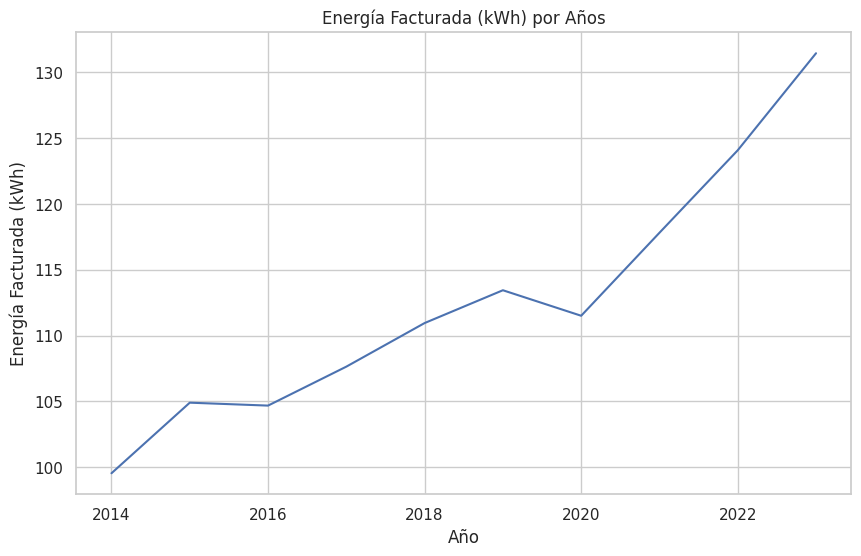

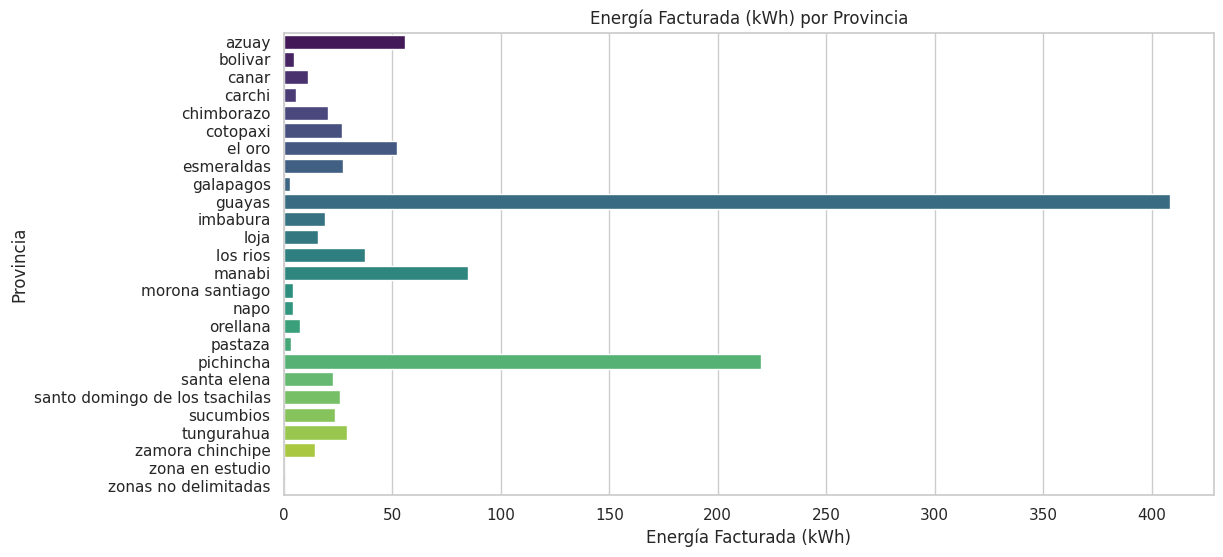

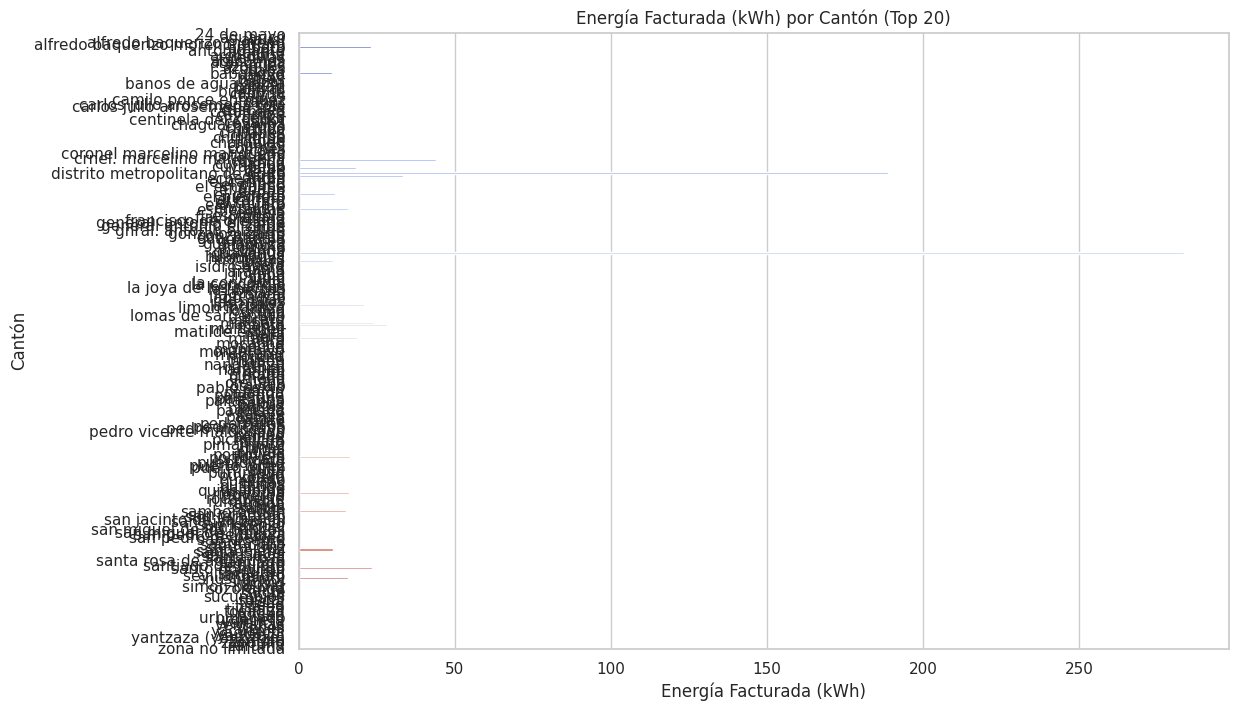

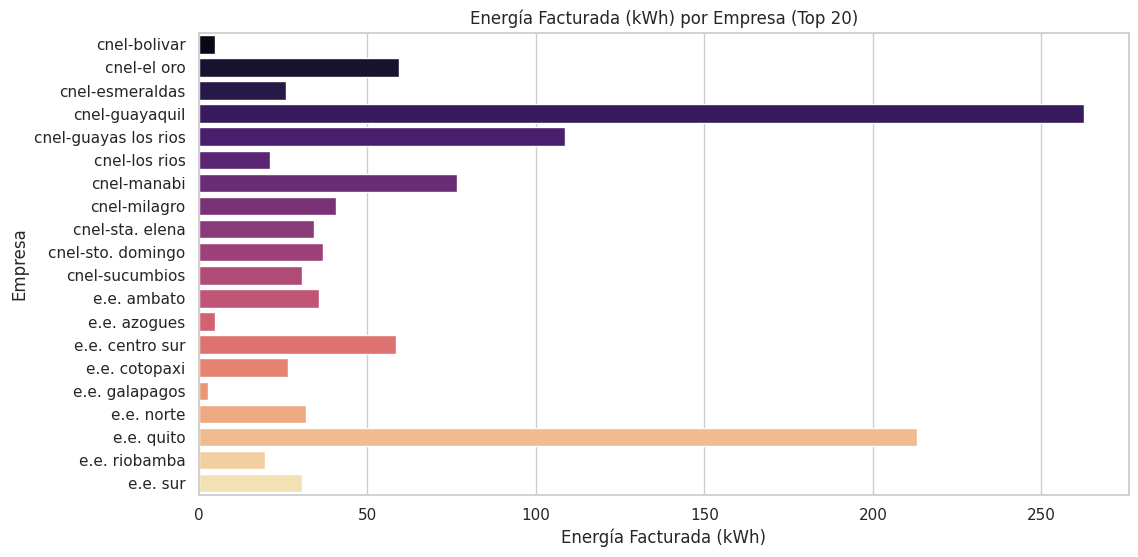

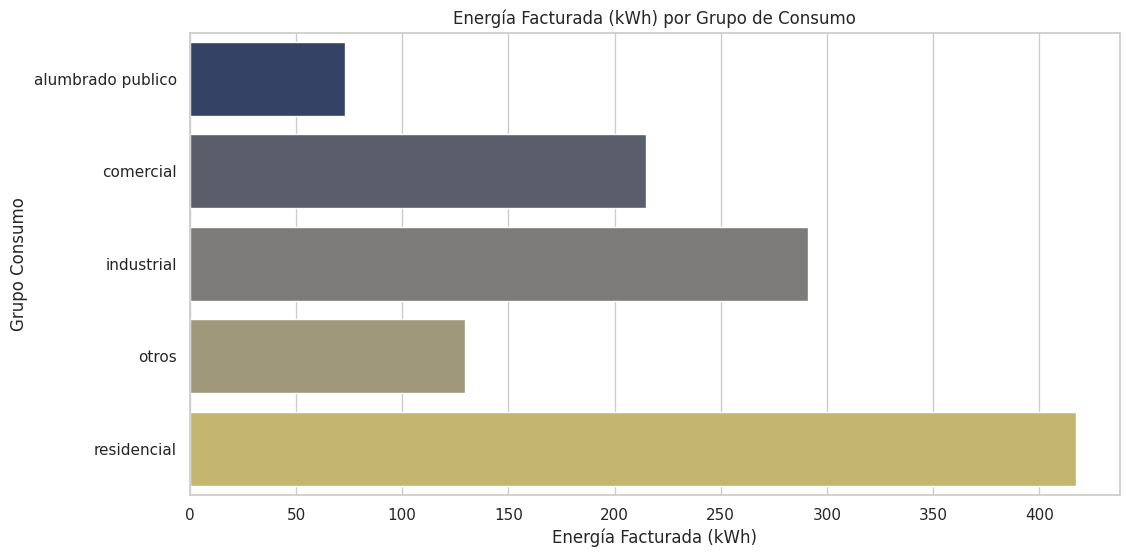

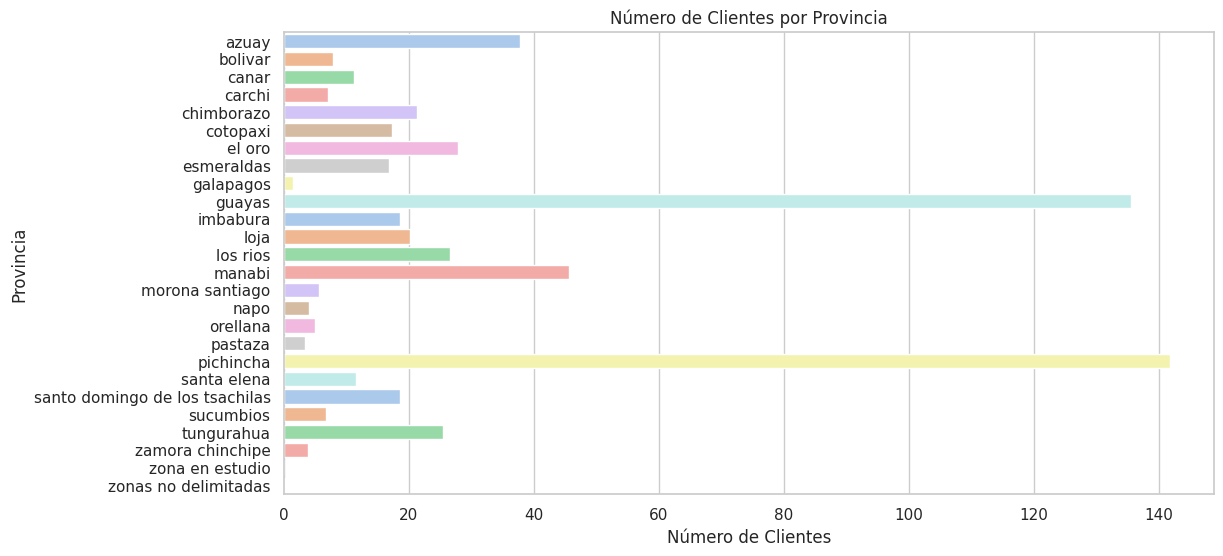

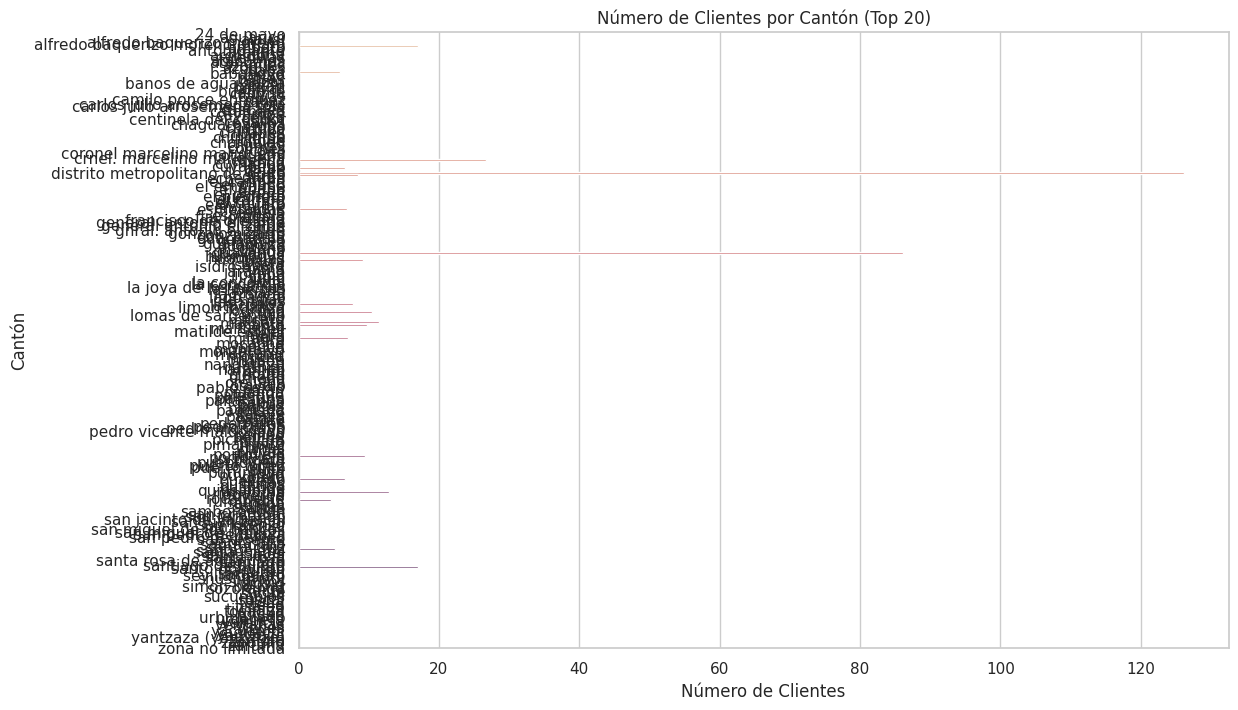

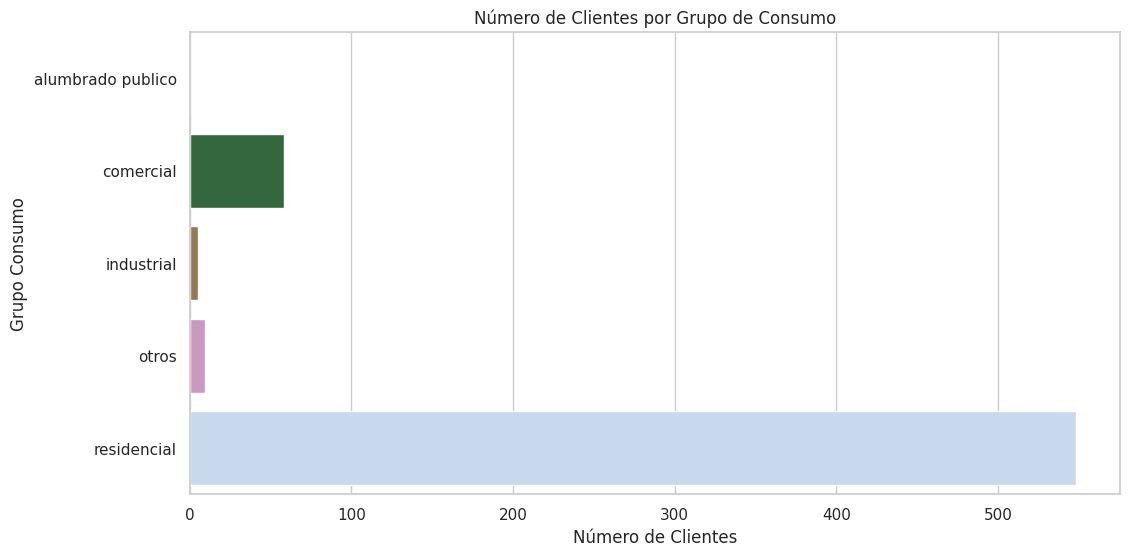

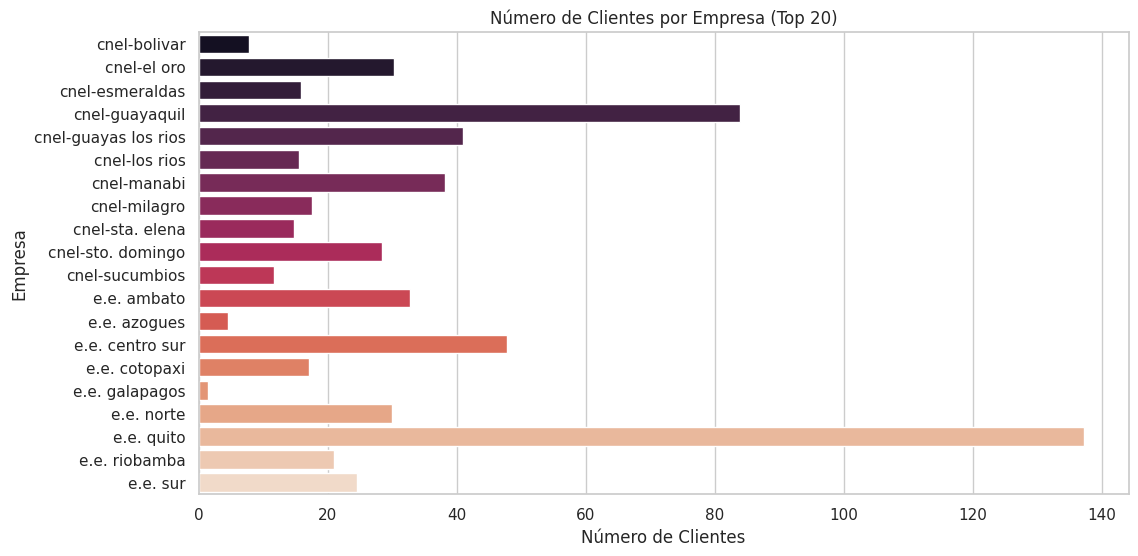

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Configuración general de los gráficos
sns.set(style="whitegrid")

# Gráfico 1: Energía Facturada (kWh) vs Fecha (Años)
plt.figure(figsize=(10, 6))
data_yearly = data_5.groupby('Año')["Energia Facturada (kWh)"].sum().reset_index()
sns.lineplot(data=data_yearly, x="Año", y="Energia Facturada (kWh)")
plt.title("Energía Facturada (kWh) por Años")
plt.xlabel("Año")
plt.ylabel("Energía Facturada (kWh)")
plt.show()

# Gráfico 2: Energía Facturada (kWh) por Provincia
plt.figure(figsize=(12, 6))
data_5vince = data_5.groupby('Provincia')["Energia Facturada (kWh)"].sum().reset_index()
sns.barplot(data=data_5vince, x="Energia Facturada (kWh)", y="Provincia", palette="viridis")
plt.title("Energía Facturada (kWh) por Provincia")
plt.xlabel("Energía Facturada (kWh)")
plt.ylabel("Provincia")
plt.show()

# Gráfico 3: Energía Facturada (kWh) por Cantón
plt.figure(figsize=(12, 8))
data_canton = data_5.groupby('Canton')["Energia Facturada (kWh)"].sum().reset_index()
data_canton = data_canton.sort_values("Energia Facturada (kWh)", ascending=False).head(20)  # Mostrar solo los 20 más altos
sns.barplot(data=data_canton, x="Energia Facturada (kWh)", y="Canton", palette="coolwarm")
plt.title("Energía Facturada (kWh) por Cantón (Top 20)")
plt.xlabel("Energía Facturada (kWh)")
plt.ylabel("Cantón")
plt.show()

# Gráfico 4: Energía Facturada (kWh) por Empresa
plt.figure(figsize=(12, 6))
data_empresa = data_5.groupby('Empresa')["Energia Facturada (kWh)"].sum().reset_index()
data_empresa = data_empresa.sort_values("Energia Facturada (kWh)", ascending=False).head(20)  # Mostrar solo los 20 más altos
sns.barplot(data=data_empresa, x="Energia Facturada (kWh)", y="Empresa", palette="magma")
plt.title("Energía Facturada (kWh) por Empresa (Top 20)")
plt.xlabel("Energía Facturada (kWh)")
plt.ylabel("Empresa")
plt.show()

# Gráfico 5: Energía Facturada (kWh) por Grupo de Consumo
plt.figure(figsize=(12, 6))
data_grupo = data_5.groupby('Grupo Consumo')["Energia Facturada (kWh)"].sum().reset_index()
sns.barplot(data=data_grupo, x="Energia Facturada (kWh)", y="Grupo Consumo", palette="cividis")
plt.title("Energía Facturada (kWh) por Grupo de Consumo")
plt.xlabel("Energía Facturada (kWh)")
plt.ylabel("Grupo Consumo")
plt.show()

# Gráfico 6: Número de Clientes por Provincia
plt.figure(figsize=(12, 6))
data_clients_prov = data_5.groupby('Provincia')["Numero Clientes"].sum().reset_index()
sns.barplot(data=data_clients_prov, x="Numero Clientes", y="Provincia", palette="pastel")
plt.title("Número de Clientes por Provincia")
plt.xlabel("Número de Clientes")
plt.ylabel("Provincia")
plt.show()

# Gráfico 7: Número de Clientes por Cantón
plt.figure(figsize=(12, 8))
data_clients_canton = data_5.groupby('Canton')["Numero Clientes"].sum().reset_index()
data_clients_canton = data_clients_canton.sort_values("Numero Clientes", ascending=False).head(20)  # Mostrar solo los 20 más altos
sns.barplot(data=data_clients_canton, x="Numero Clientes", y="Canton", palette="flare")
plt.title("Número de Clientes por Cantón (Top 20)")
plt.xlabel("Número de Clientes")
plt.ylabel("Cantón")
plt.show()

# Gráfico 8: Número de Clientes por Grupo de Consumo
plt.figure(figsize=(12, 6))
data_clients_grupo = data_5.groupby('Grupo Consumo')["Numero Clientes"].sum().reset_index()
sns.barplot(data=data_clients_grupo, x="Numero Clientes", y="Grupo Consumo", palette="cubehelix")
plt.title("Número de Clientes por Grupo de Consumo")
plt.xlabel("Número de Clientes")
plt.ylabel("Grupo Consumo")
plt.show()

# Gráfico 9: Número de Clientes por Empresa
plt.figure(figsize=(12, 6))
data_clients_empresa = data_5.groupby('Empresa')["Numero Clientes"].sum().reset_index()
data_clients_empresa = data_clients_empresa.sort_values("Numero Clientes", ascending=False).head(20)  # Mostrar solo los 20 más altos
sns.barplot(data=data_clients_empresa, x="Numero Clientes", y="Empresa", palette="rocket")
plt.title("Número de Clientes por Empresa (Top 20)")
plt.xlabel("Número de Clientes")
plt.ylabel("Empresa")
plt.show()


In [30]:
#  LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Convertir columnas categóricas a valores numéricos
data_5['Provincia'] = label_encoder.fit_transform(data_5['Provincia'])
data_5['Canton'] = label_encoder.fit_transform(data_5['Canton'])
data_5['Empresa'] = label_encoder.fit_transform(data_5['Empresa'])
data_5['Grupo Consumo'] = label_encoder.fit_transform(data_5['Grupo Consumo'])

data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134147 entries, 0 to 134146
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Fecha                                 134147 non-null  datetime64[ns]
 1   Provincia                             134147 non-null  int64         
 2   Canton                                134147 non-null  int64         
 3   Empresa                               134147 non-null  int64         
 4   Grupo Consumo                         134147 non-null  int64         
 5   Numero Clientes                       134147 non-null  float64       
 6   Energia Facturada (kWh)               134147 non-null  float64       
 7   Facturacion Servicio Electrico (USD)  134147 non-null  float64       
 8   Año                                   134147 non-null  int64         
 9   Mes                                   134147 non-null  int6

In [31]:

data_5.head()

,Fecha,Provincia,Canton,Empresa,Grupo Consumo,Numero Clientes,Energia Facturada (kWh),Facturacion Servicio Electrico (USD),Año,Mes
0,2014-01-01,0,25,1,1,0.000353,0.000926,0.233165,2014,1
1,2014-01-01,0,25,1,2,0.000190,0.023265,0.245967,2014,1
2,2014-01-01,0,25,1,3,0.000084,0.000200,0.232692,2014,1
3,2014-01-01,0,25,1,4,0.004853,0.002993,0.234906,2014,1
4,2014-01-01,0,25,13,1,0.000005,0.000011,0.232593,2014,1


In [32]:
# Data_pro.csv  dataset procesado guardado en drive
ruta_archivo = '/content/drive/My Drive/Tesis/DATASET/data_pro.csv'
data_5.to_csv(ruta_archivo, index=False)
print(f"Archivo guardado exitosamente en: {ruta_archivo}")
data_pro = pd.read_csv(ruta_archivo)
data_pro.info()
data_pro.head()


Archivo guardado exitosamente en: /content/drive/My Drive/Tesis/DATASET/data_pro.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134147 entries, 0 to 134146
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Fecha                                 134147 non-null  object 
 1   Provincia                             134147 non-null  int64  
 2   Canton                                134147 non-null  int64  
 3   Empresa                               134147 non-null  int64  
 4   Grupo Consumo                         134147 non-null  int64  
 5   Numero Clientes                       134147 non-null  float64
 6   Energia Facturada (kWh)               134147 non-null  float64
 7   Facturacion Servicio Electrico (USD)  134147 non-null  float64
 8   Año                                   134147 non-null  int64  
 9   Mes                                   134147 non-nu

,Fecha,Provincia,Canton,Empresa,Grupo Consumo,Numero Clientes,Energia Facturada (kWh),Facturacion Servicio Electrico (USD),Año,Mes
0,2014-01-01,0,25,1,1,0.000353,0.000926,0.233165,2014,1
1,2014-01-01,0,25,1,2,0.000190,0.023265,0.245967,2014,1
2,2014-01-01,0,25,1,3,0.000084,0.000200,0.232692,2014,1
3,2014-01-01,0,25,1,4,0.004853,0.002993,0.234906,2014,1
4,2014-01-01,0,25,13,1,0.000005,0.000011,0.232593,2014,1


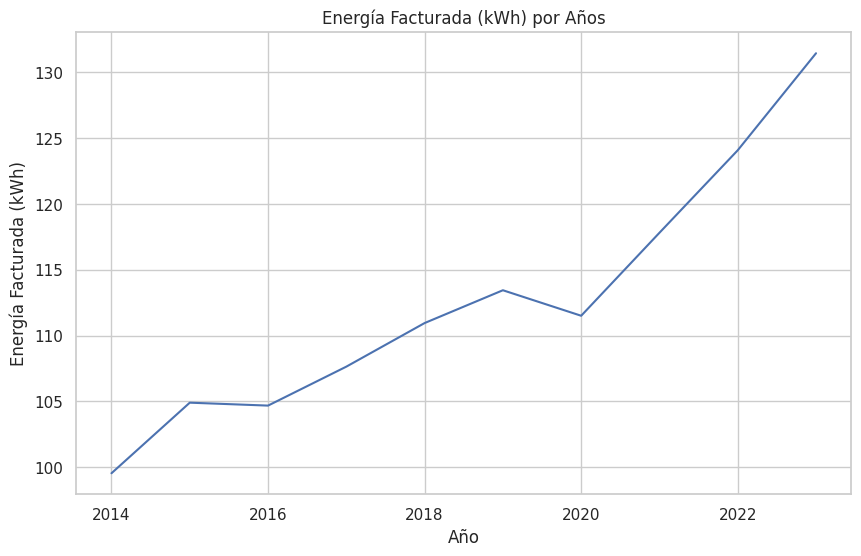

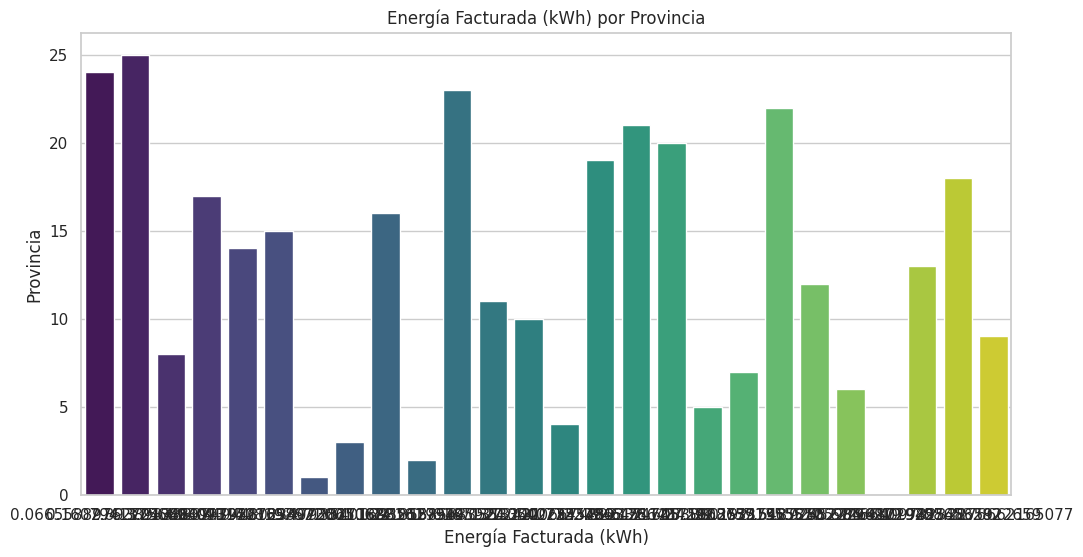

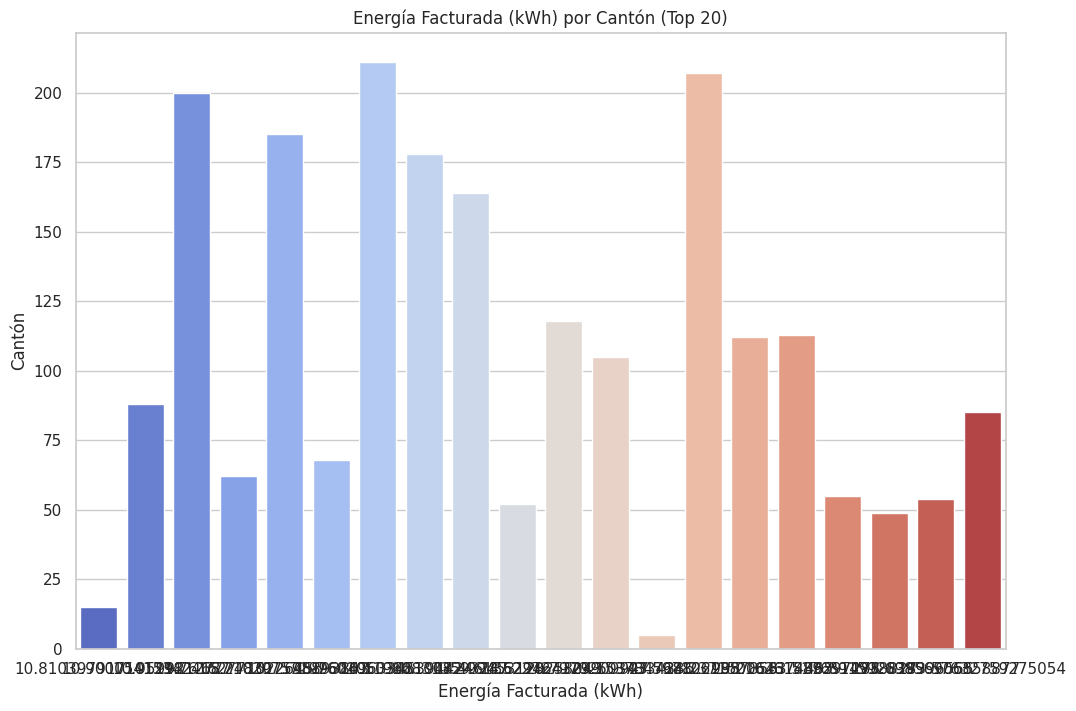

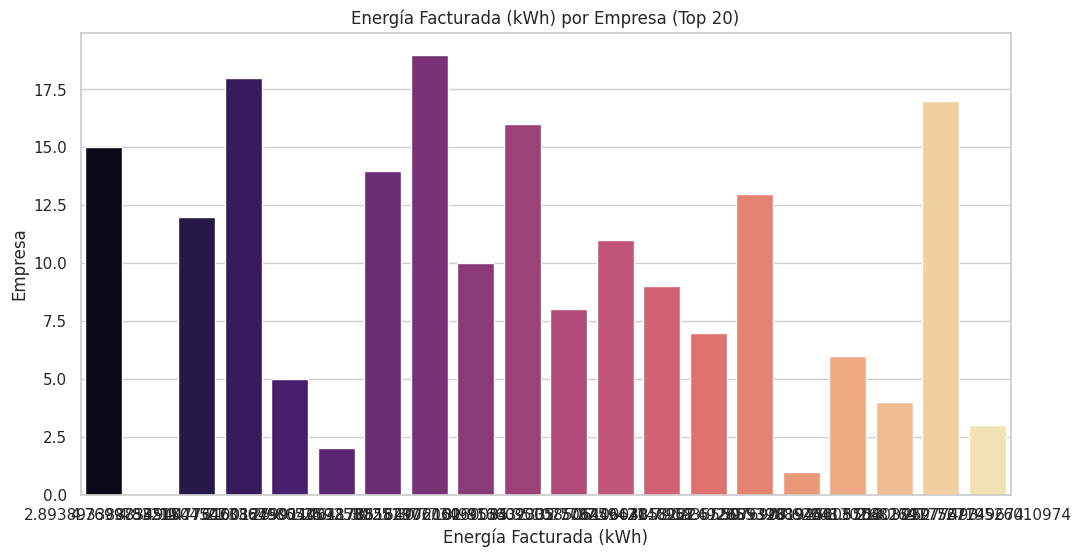

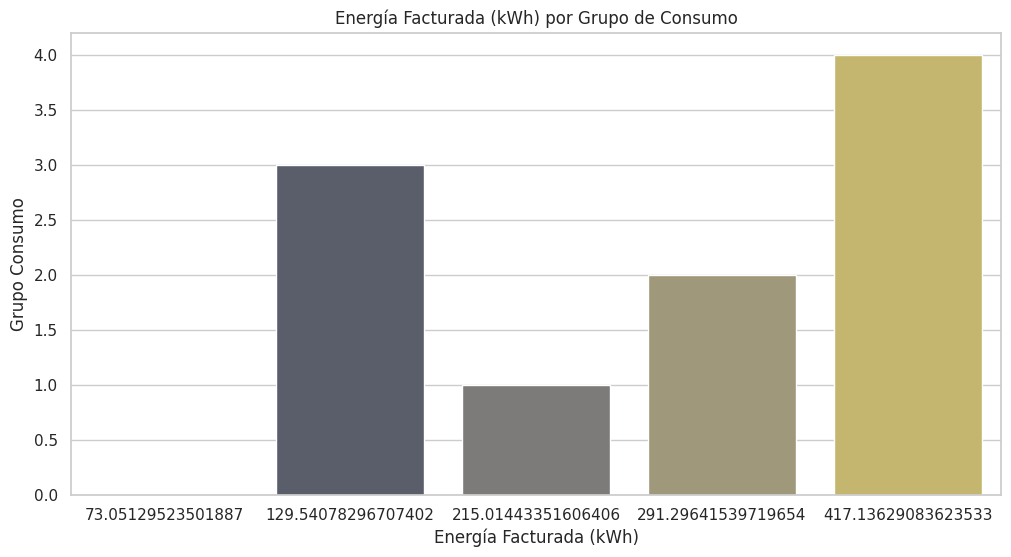

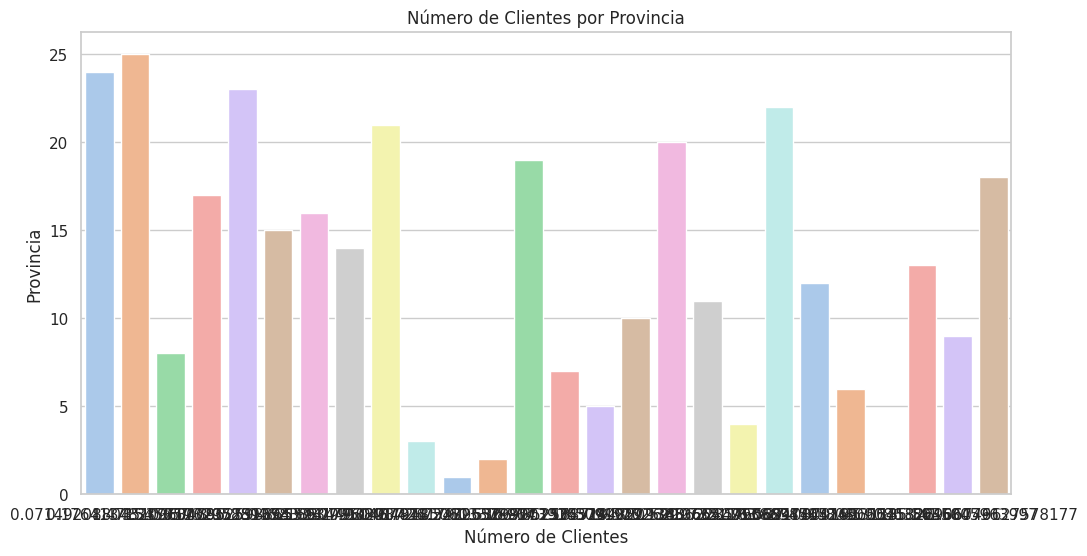

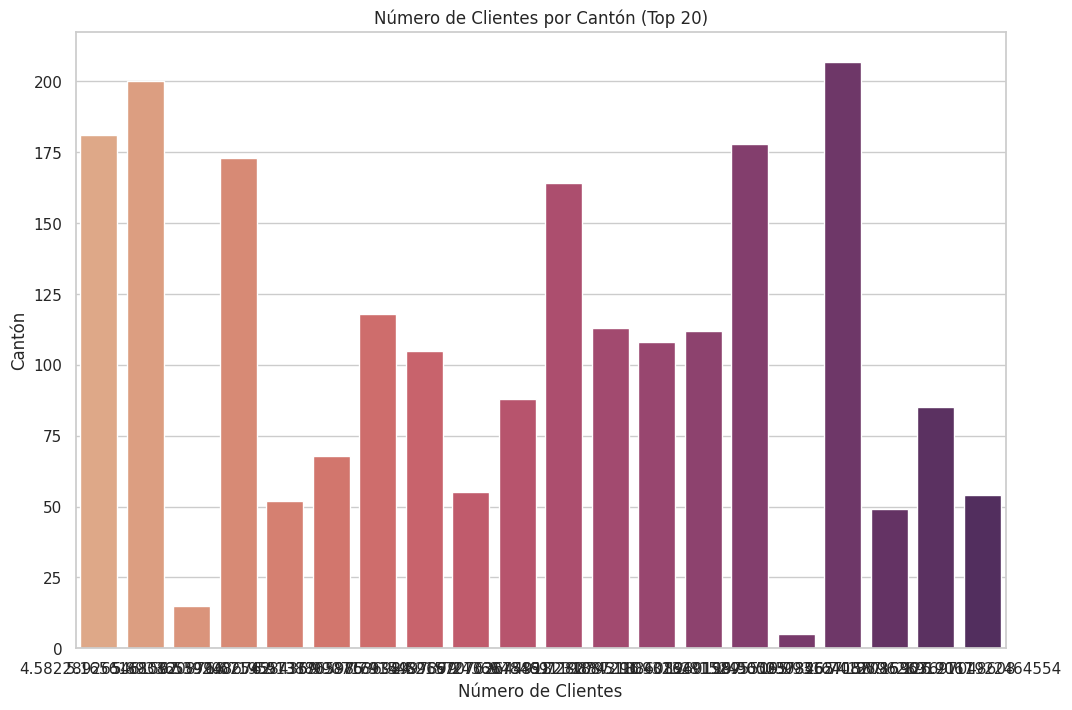

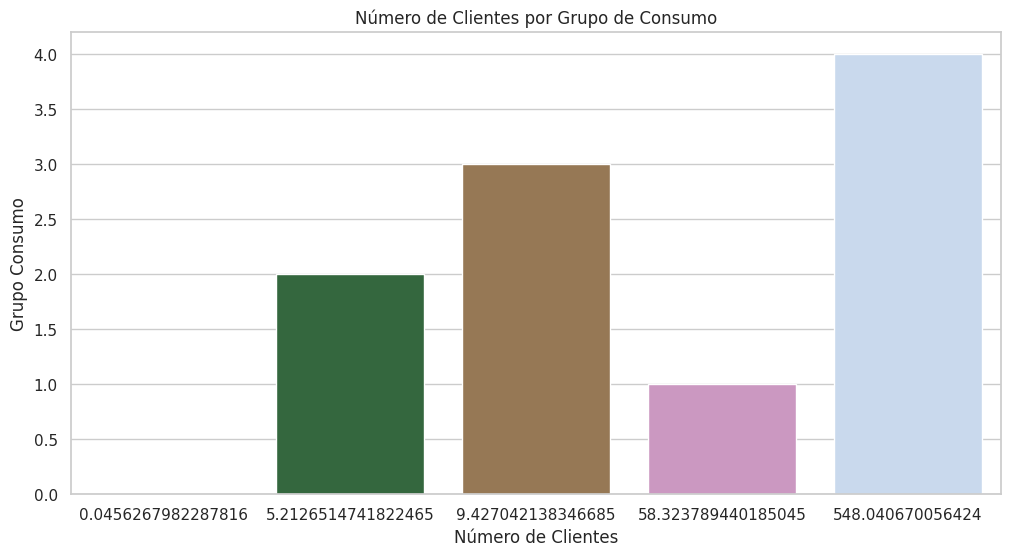

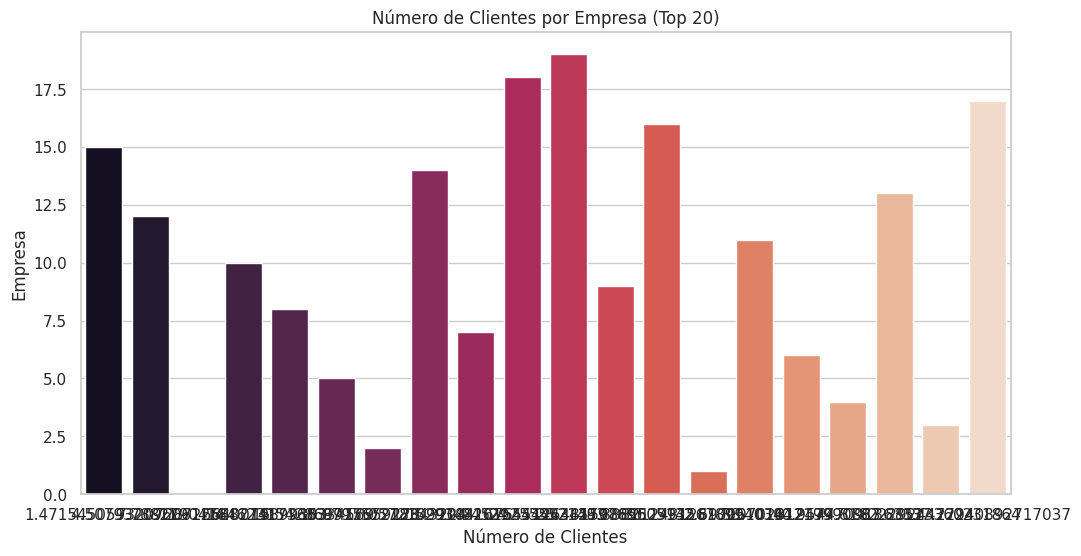

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convertir la columna 'Fecha' a datetime
data_pro['Fecha'] = pd.to_datetime(data_pro['Fecha'], errors='coerce')

# Crear una columna de años
data_pro['Año'] = data_pro['Fecha'].dt.year

# Configuración general de los gráficos
sns.set(style="whitegrid")

# Gráfico 1: Energía Facturada (kWh) vs Fecha (Años)
plt.figure(figsize=(10, 6))
data_yearly = data_pro.groupby('Año')["Energia Facturada (kWh)"].sum().reset_index()
sns.lineplot(data=data_yearly, x="Año", y="Energia Facturada (kWh)")
plt.title("Energía Facturada (kWh) por Años")
plt.xlabel("Año")
plt.ylabel("Energía Facturada (kWh)")
plt.show()

# Gráfico 2: Energía Facturada (kWh) por Provincia
plt.figure(figsize=(12, 6))
data_province = data_pro.groupby('Provincia')["Energia Facturada (kWh)"].sum().reset_index()
sns.barplot(data=data_province, x="Energia Facturada (kWh)", y="Provincia", palette="viridis")
plt.title("Energía Facturada (kWh) por Provincia")
plt.xlabel("Energía Facturada (kWh)")
plt.ylabel("Provincia")
plt.show()

# Gráfico 3: Energía Facturada (kWh) por Cantón
plt.figure(figsize=(12, 8))
data_canton = data_pro.groupby('Canton')["Energia Facturada (kWh)"].sum().reset_index()
data_canton = data_canton.sort_values("Energia Facturada (kWh)", ascending=False).head(20)  # Mostrar solo los 20 más altos
sns.barplot(data=data_canton, x="Energia Facturada (kWh)", y="Canton", palette="coolwarm")
plt.title("Energía Facturada (kWh) por Cantón (Top 20)")
plt.xlabel("Energía Facturada (kWh)")
plt.ylabel("Cantón")
plt.show()

# Gráfico 4: Energía Facturada (kWh) por Empresa
plt.figure(figsize=(12, 6))
data_empresa = data_pro.groupby('Empresa')["Energia Facturada (kWh)"].sum().reset_index()
data_empresa = data_empresa.sort_values("Energia Facturada (kWh)", ascending=False).head(20)  # Mostrar solo los 20 más altos
sns.barplot(data=data_empresa, x="Energia Facturada (kWh)", y="Empresa", palette="magma")
plt.title("Energía Facturada (kWh) por Empresa (Top 20)")
plt.xlabel("Energía Facturada (kWh)")
plt.ylabel("Empresa")
plt.show()

# Gráfico 5: Energía Facturada (kWh) por Grupo de Consumo
plt.figure(figsize=(12, 6))
data_grupo = data_pro.groupby('Grupo Consumo')["Energia Facturada (kWh)"].sum().reset_index()
sns.barplot(data=data_grupo, x="Energia Facturada (kWh)", y="Grupo Consumo", palette="cividis")
plt.title("Energía Facturada (kWh) por Grupo de Consumo")
plt.xlabel("Energía Facturada (kWh)")
plt.ylabel("Grupo Consumo")
plt.show()

# Gráfico 6: Número de Clientes por Provincia
plt.figure(figsize=(12, 6))
data_clients_prov = data_pro.groupby('Provincia')["Numero Clientes"].sum().reset_index()
sns.barplot(data=data_clients_prov, x="Numero Clientes", y="Provincia", palette="pastel")
plt.title("Número de Clientes por Provincia")
plt.xlabel("Número de Clientes")
plt.ylabel("Provincia")
plt.show()

# Gráfico 7: Número de Clientes por Cantón
plt.figure(figsize=(12, 8))
data_clients_canton = data_pro.groupby('Canton')["Numero Clientes"].sum().reset_index()
data_clients_canton = data_clients_canton.sort_values("Numero Clientes", ascending=False).head(20)  # Mostrar solo los 20 más altos
sns.barplot(data=data_clients_canton, x="Numero Clientes", y="Canton", palette="flare")
plt.title("Número de Clientes por Cantón (Top 20)")
plt.xlabel("Número de Clientes")
plt.ylabel("Cantón")
plt.show()

# Gráfico 8: Número de Clientes por Grupo de Consumo
plt.figure(figsize=(12, 6))
data_clients_grupo = data_pro.groupby('Grupo Consumo')["Numero Clientes"].sum().reset_index()
sns.barplot(data=data_clients_grupo, x="Numero Clientes", y="Grupo Consumo", palette="cubehelix")
plt.title("Número de Clientes por Grupo de Consumo")
plt.xlabel("Número de Clientes")
plt.ylabel("Grupo Consumo")
plt.show()

# Gráfico 9: Número de Clientes por Empresa
plt.figure(figsize=(12, 6))
data_clients_empresa = data_pro.groupby('Empresa')["Numero Clientes"].sum().reset_index()
data_clients_empresa = data_clients_empresa.sort_values("Numero Clientes", ascending=False).head(20)  # Mostrar solo los 20 más altos
sns.barplot(data=data_clients_empresa, x="Numero Clientes", y="Empresa", palette="rocket")
plt.title("Número de Clientes por Empresa (Top 20)")
plt.xlabel("Número de Clientes")
plt.ylabel("Empresa")
plt.show()
